In [17]:
# read excel 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

In [18]:
# read excel 
excel_file = 'summarization_textrank_results.xlsx'
df = pd.read_excel(excel_file)
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,add_kg_info,weight,weight,weight,weight,filter,filter,filter,filter,weight,weight,weight,weight,filter,filter,filter,filter
1,wiki_usage,just_sentences,just_sentences,sentences_n_words,sentences_n_words,just_sentences,just_sentences,sentences_n_words,sentences_n_words,just_sentences,just_sentences,sentences_n_words,sentences_n_words,just_sentences,just_sentences,sentences_n_words,sentences_n_words
2,kind_summ,no,no,no,no,no,no,no,no,yes,yes,yes,yes,yes,yes,yes,yes
3,counting,num_sentences,percentage_txt,num_sentences,percentage_txt,num_sentences,percentage_txt,num_sentences,percentage_txt,num_sentences,percentage_txt,num_sentences,percentage_txt,num_sentences,percentage_txt,num_sentences,percentage_txt
4,ROUGE-1,0.373272,0.458515,0.373272,0.458515,0.373272,0.458515,0.373272,0.458515,0.373272,0.458515,0.373272,0.458515,0.373272,0.458515,0.373272,0.458515


In [19]:
means = df.iloc[4:, 1:].mean()
stds = df.iloc[4:, 1:].std()
means

0     0.493261
1     0.538231
2     0.493261
3      0.53712
4      0.49215
5     0.538231
6     0.493261
7     0.538231
8      0.49215
9      0.53712
10    0.493261
11    0.538231
12    0.493261
13    0.538231
14     0.49215
15    0.538231
dtype: object

In [20]:
# Append the mean values as a new row to the DataFrame and label it as 'mean'
df.loc[len(df)] = ['mean'] + means.tolist()
df.loc[len(df)] = ['std'] + stds.tolist()

# Save the updated DataFrame back to the Excel file
df.to_excel(excel_file, index=False)

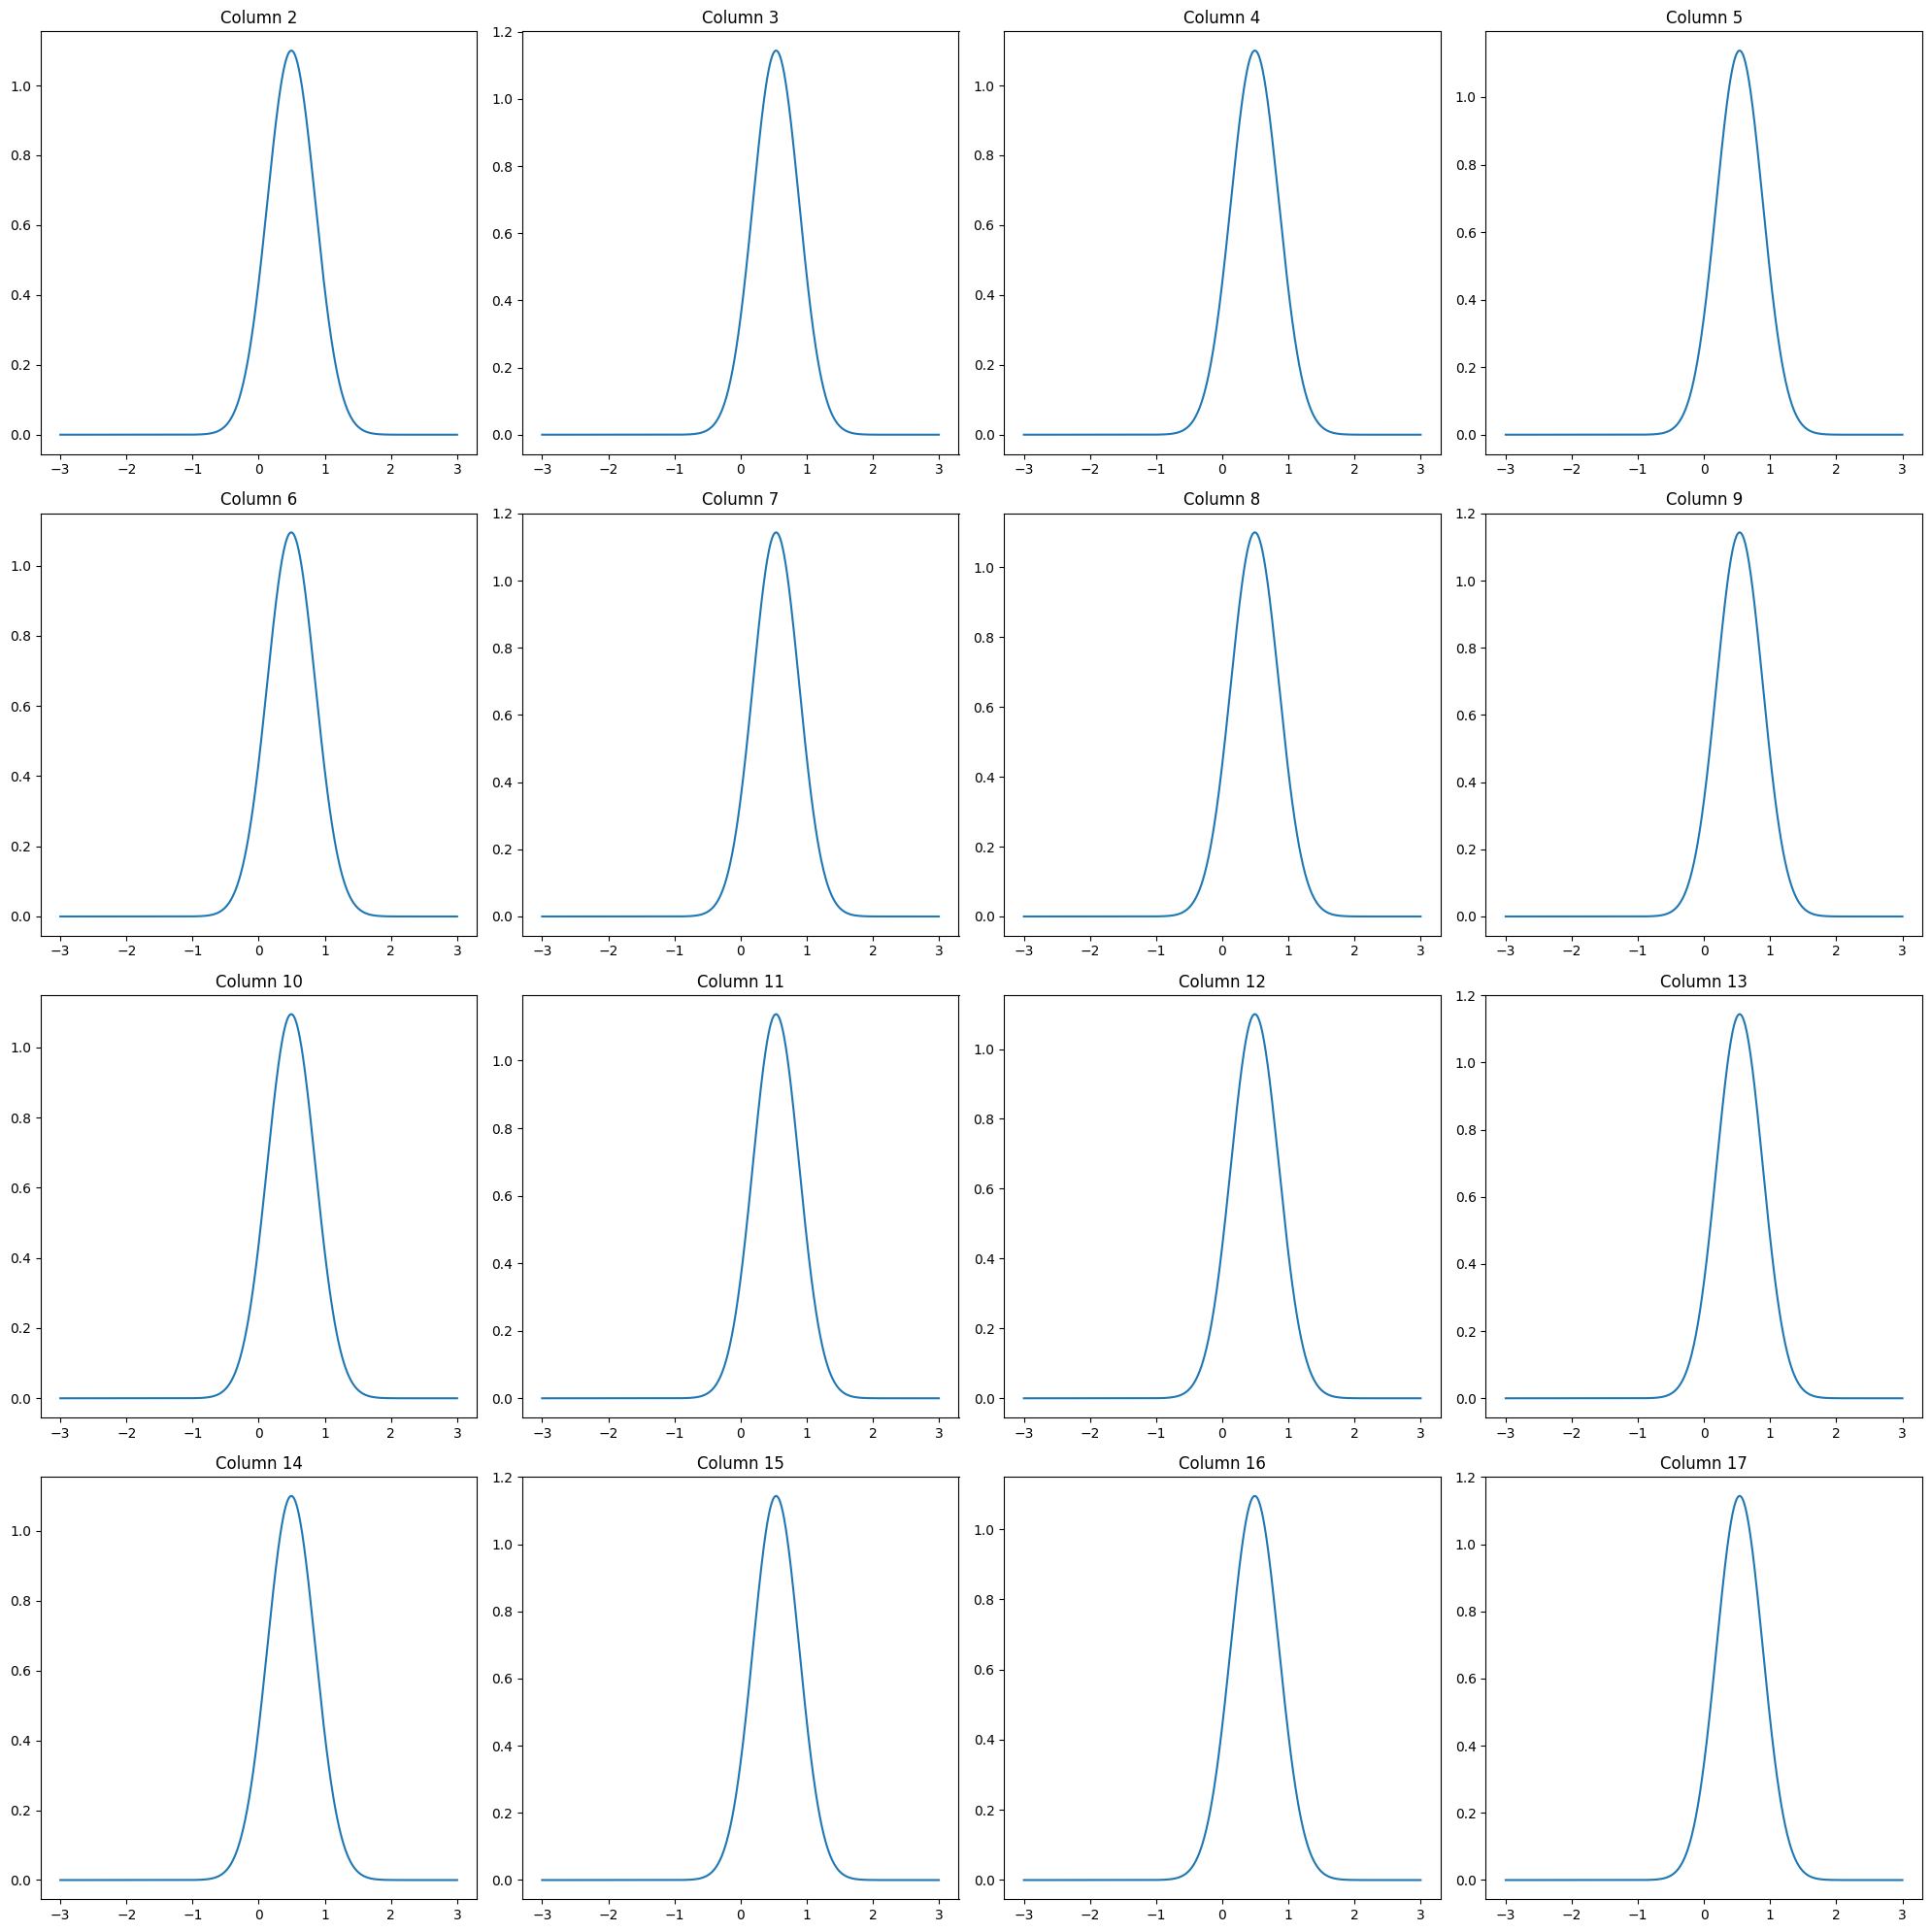

In [21]:
# Number of columns to plot
num_columns = len(means)

# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # 4x4 grid for 16 plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the normal distribution for each column
x = np.linspace(-3, 3, 1000)  # X-axis range for the normal distribution

for i in range(num_columns):
    mean = means[i]
    std = stds[i]
    y = norm.pdf(x, mean, std)  # Calculate the normal distribution
    axes[i].plot(x, y)
    axes[i].set_title(f'Column {i+2}')  # Adjust the title to match the column index

# Adjust layout
plt.tight_layout()
plt.show()

In [32]:
# get max mean value index
max_mean_index = means.idxmax()

#print(f'Max mean value is in column {max_mean_index} with value {means[max_mean_index]}')
df.iloc[:4, max_mean_index] 

Max mean value is in column 1 with value 0.5382312831640398
